# 🧀 Canadian Cheese & Weather Analysis

## 🧠 Introduction
As a Data Analyst Intern at the CSF, this notebook explores the relationship between provincial temperatures and the number of cheese types produced across Canada. By merging the Canadian Cheese Directory with average weather data, we aim to uncover patterns and test if climate correlates with cheese variety.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## 📚 Data Sources

- [Canadian Cheese Directory](https://www.kaggle.com/datasets/noahjanes/canadian-cheese-directory/data)
- [Canada Weather](https://www.kaggle.com/datasets/hemil26/canada-weather)


In [27]:
# Load datasets
cheese_df = pd.read_csv("data/cheese_data.csv")
weather_df = pd.read_csv("data/canada_weather.csv")


## 🧹 Data Cleaning & Merging

We extracted province codes from both datasets and cleaned the temperature column to isolate Celsius values. After grouping the number of cheese entries per province, we merged the data with average annual temperatures.

In [28]:
# Clean weather columns
weather_df.columns = weather_df.columns.str.strip()

# Extract province code from Community column
weather_df['Province'] = weather_df['Community'].astype(str).str.extract(r',\s*([A-Z]{2})')

# Extract Celsius temperature from annual average high column
weather_df['Avg_Temp_C'] = weather_df['Annual(Avg. high °C (°F))'].astype(str).str.extract(r'([-+]?\d*\.?\d+)').astype(float)

# Clean province codes in cheese data
cheese_df['Province'] = cheese_df['ManufacturerProvCode'].str.strip()

# Group cheese count per province
cheese_counts = cheese_df.groupby('Province').size().reset_index(name='Cheese_Count')

# Merge cheese + temperature data
merged_df = pd.merge(cheese_counts, weather_df[['Province', 'Avg_Temp_C']], on='Province', how='inner')
merged_df = merged_df.sort_values(by='Avg_Temp_C')

# Preview final table
merged_df.head()


,Province,Cheese_Count,Avg_Temp_C
15,NL,2,1.7
8,MB,11,2.3
9,MB,11,3.4
3,BC,65,5.2
2,AB,13,5.2


## 📊 Visualizations

### 1. Cheese Variety by Province
A bar chart shows the number of cheese types per province.

### 2. Temperature vs Cheese Variety
A scatterplot visualizes whether average temperature impacts cheese variety.


C:\Users\aryan\AppData\Local\Temp\ipykernel_25960\1747264032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='Cheese_Count', y='Province', palette='coolwarm')


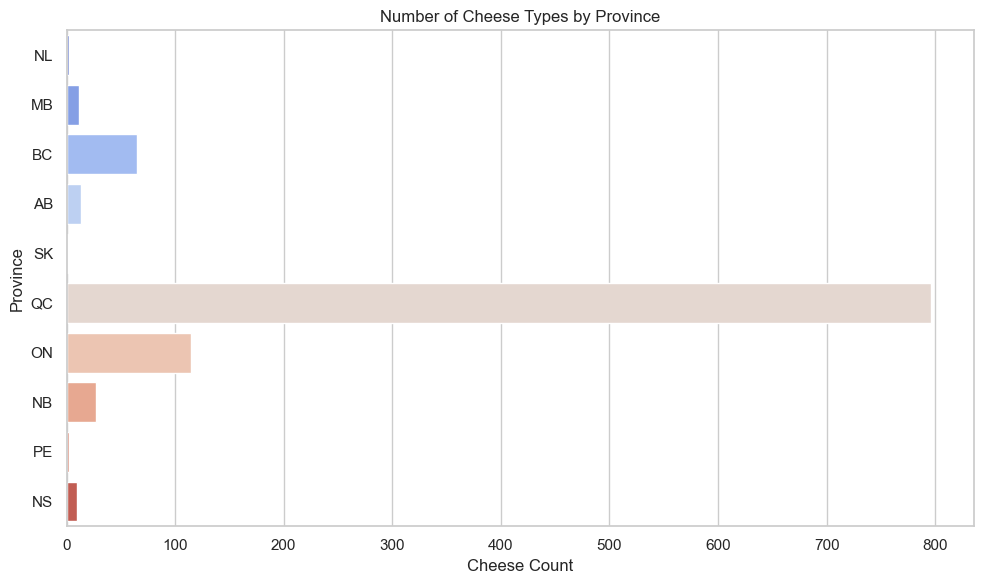

In [29]:
# Bar chart of cheese counts by province
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Cheese_Count', y='Province', palette='coolwarm')
plt.title('Number of Cheese Types by Province')
plt.xlabel('Cheese Count')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


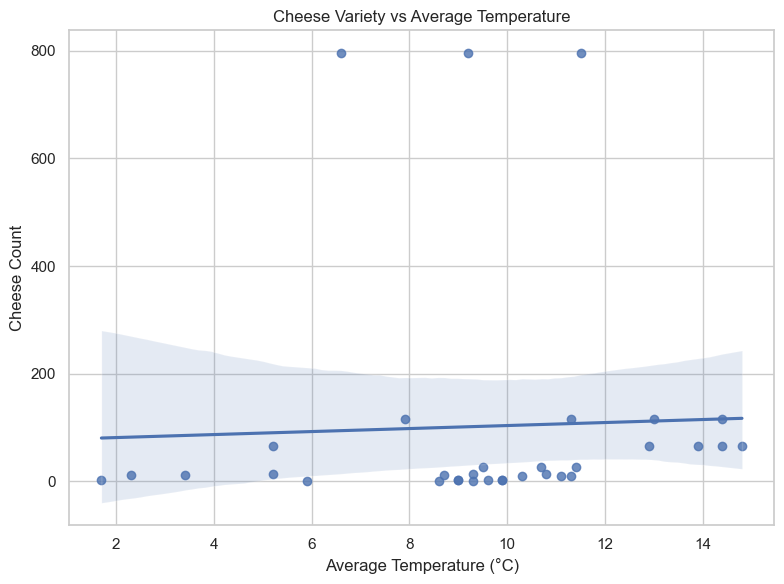

In [30]:
# Scatter plot of temp vs cheese count
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='Avg_Temp_C', y='Cheese_Count', marker='o')
plt.title('Cheese Variety vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Cheese Count')
plt.tight_layout()
plt.show()


## 🔍 Key Inference

- Quebec leads in cheese variety, followed by Ontario and British Columbia.
- There appears to be a **mild inverse trend** between average temperature and cheese variety: cooler provinces tend to produce more cheese types.
- Warmer regions have fewer entries, possibly due to climate limitations in dairy farming or smaller cheese industries.


# Load datasets
cheese_df = pd.read_csv("data/cheese_data.csv")
weather_df = pd.read_csv("data/canada_weather.csv")


## 📎 References

- Canadian Cheese Directory: [Kaggle](https://www.kaggle.com/datasets/noahjanes/canadian-cheese-directory/data)
- Canada Weather Data: [Kaggle](https://www.kaggle.com/datasets/hemil26/canada-weather)
